In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airquality/AirQualityUCI.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/airquality/AirQualityUCI.csv")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888


In [4]:
df.shape

(9357, 15)

In [5]:
#Formatting Date and Time to datetime type

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) 

#df['Time'] = pd.to_datetime(df['Time'],format= '%H.%M.%S' ).dt.time

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888


In [6]:
from datetime import datetime

now = datetime.now() # current date and time
print(now)
year = now.strftime("%Y")
print("year:", year)

month = now.strftime("%m")
print("month:", month)

day = now.strftime("%d")
print("day:", day)

time = now.strftime("%H:%M:%S")
print("time:", time)

date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)	

2023-01-06 09:19:24.003113
year: 2023
month: 01
day: 06
time: 09:19:24
date and time: 01/06/2023, 09:19:24


In [7]:
#df['Time'] = pd.to_datetime(df['Time'], format= '%H.%M.%S' ).dt.time

In [8]:
df.isnull().sum() / len(df)

Date             0.000000
Time             0.000000
CO(GT)           0.000000
PT08.S1(CO)      0.000000
NMHC(GT)         0.000000
C6H6(GT)         0.000000
PT08.S2(NMHC)    0.000000
NOx(GT)          0.000000
PT08.S3(NOx)     0.000000
NO2(GT)          0.000000
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000107
dtype: float64

In [9]:
NMHC_ratio = df['NMHC(GT)'].isna().sum()/len(df['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 0.00% of missing data.


In [10]:
df['NMHC(GT)'].isnull().sum()

0

In [11]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               1
dtype: int64

In [12]:
df.nunique()

Date              391
Time               26
CO(GT)             98
PT08.S1(CO)      1042
NMHC(GT)          431
C6H6(GT)          409
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           285
PT08.S4(NO2)     1604
PT08.S5(O3)      1745
T                 438
RH                755
AH               6683
dtype: int64

In [13]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9356.000000
mean,-34.033536,1048.816074,-159.066485,2.004628,894.432724,168.696484,794.910655,58.360372,1391.462755,974.900780,9.782430,39.479397,-6.838464
std,79.096080,330.062067,139.800836,43.568942,342.491834,257.434899,322.147362,128.153143,467.198972,456.996348,43.206308,51.217345,38.978664
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692250
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.500000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296300
max,1428.000000,2040.000000,1189.000000,1321.000000,2214.000000,1479.000000,2683.000000,1779.000000,2775.000000,2523.000000,57.200000,88.700000,2.231000


In [14]:
# to know if there null values or not
df.apply(lambda x: len(x.isnull()))

Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

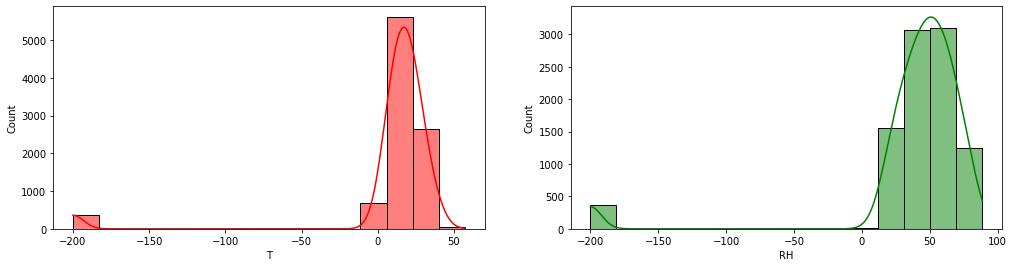

In [15]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df["T"],stat="count",color="red",bins=15,kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(df.RH,stat="count",color = "green",bins=15,kde={'alpha':0.5})
plt.show()

<AxesSubplot:xlabel='AH', ylabel='Count'>

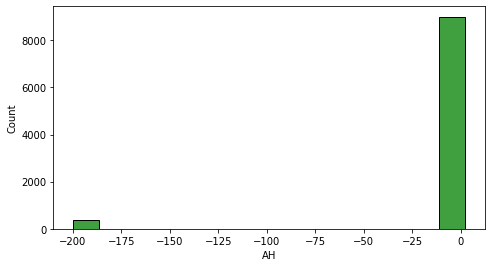

In [16]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.AH,stat="count",color="green",bins=15)

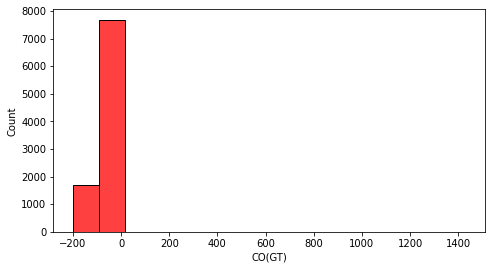

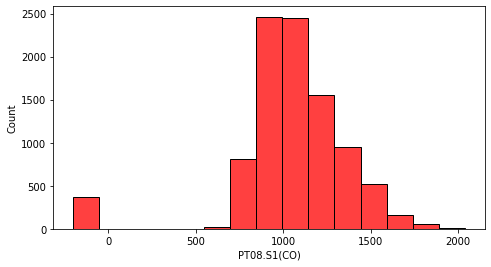

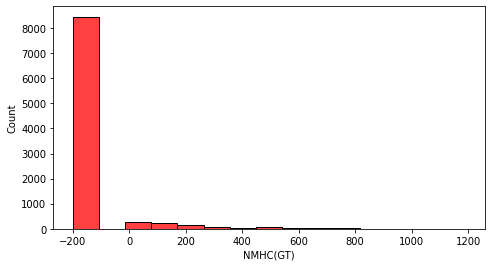

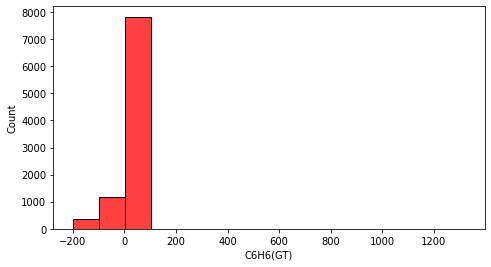

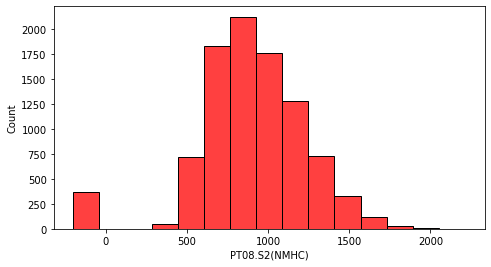

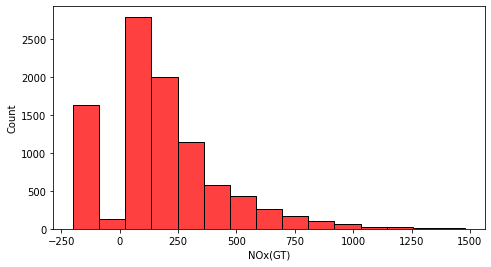

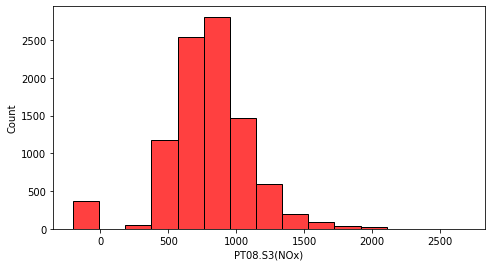

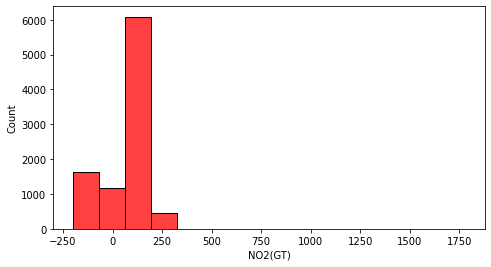

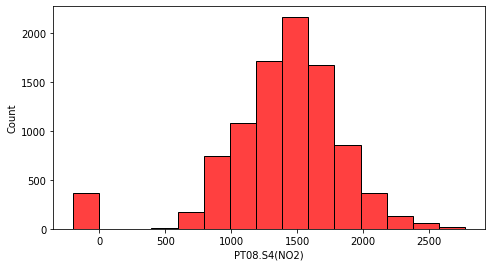

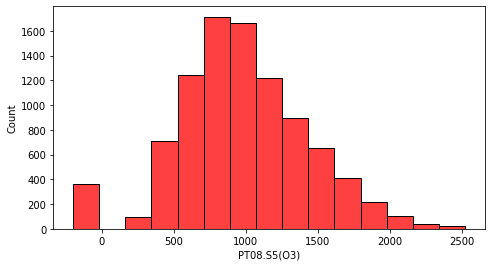

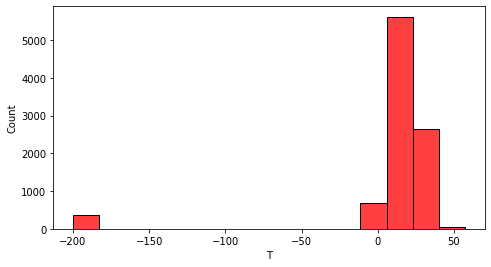

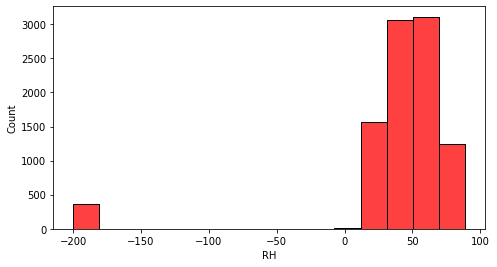

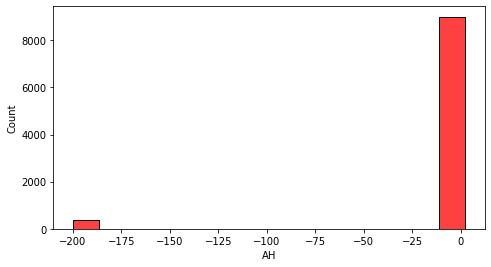

In [17]:
for i in df.columns[2:]:
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.histplot(x=df[i],stat="count",color="red",bins=15)
    #plt.hist(x=df[i],stat="count",color="red",bins=15, rwidth=0.9)
    